In [1]:
# Program to train a simple RNN for a node. 

In [2]:
# Importing library

from numpy.random import seed
seed(0)
import tensorflow
from tensorflow import keras
tensorflow.random.set_seed(0)

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading csv

df_in = pd.read_csv('all_node_data.csv')
df_in.head() 

,node_id,rsrp1,rsrp2,rsrp3,rsrp4,rsrp5,rsrq1,rsrq2,rsrq3,rsrq4,rsrq5,rssi1,rssi2,rssi3,rssi4,rssi5,rtt_avg
0,312,-82,-82,-82,-82,-82,-6,-6,-6,-6,-6,-59,-59,-59,-59,-59,0.035095
1,312,-82,-82,-82,-82,-82,-6,-6,-6,-6,-6,-59,-59,-59,-59,-59,0.035158
2,312,-82,-82,-82,-82,-82,-6,-6,-6,-6,-6,-59,-59,-59,-59,-59,0.034815
3,312,-82,-82,-82,-82,-82,-6,-6,-6,-6,-6,-59,-59,-59,-59,-59,0.034977
4,312,-82,-82,-82,-82,-82,-6,-6,-6,-6,-6,-59,-59,-59,-59,-59,0.034520


In [4]:
len(df_in)

20160

In [5]:
df_in.describe()

,node_id,rsrp1,rsrp2,rsrp3,rsrp4,rsrp5,rsrq1,rsrq2,rsrq3,rsrq4,rsrq5,rssi1,rssi2,rssi3,rssi4,rssi5,rtt_avg
count,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000,20160.000000
mean,1061.414286,-86.258482,-86.258433,-86.261756,-86.262302,-86.260218,-8.598661,-8.592659,-8.598512,-8.588641,-8.601935,-60.486657,-60.497669,-60.495188,-60.505853,-60.492808,0.497264
std,430.870275,12.663468,12.661445,12.667944,12.667860,12.666834,2.098353,2.110247,2.104521,2.101445,2.096943,11.638657,11.645537,11.635232,11.629223,11.641441,3.612247
min,312.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-87.000000,-85.000000,-86.000000,-87.000000,-87.000000,-22.946514
25%,865.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-69.000000,-69.000000,-69.000000,-69.000000,-69.000000,0.047390
50%,952.000000,-86.000000,-86.000000,-86.000000,-86.000000,-86.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-61.000000,-61.000000,-61.000000,-61.000000,-61.000000,0.054749
75%,1044.000000,-77.000000,-77.000000,-77.000000,-77.000000,-77.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-52.000000,-52.000000,-52.000000,-52.000000,-52.000000,0.062431
max,2564.000000,-48.000000,-48.000000,-48.000000,-48.000000,-49.000000,-3.000000,-4.000000,-3.000000,-4.000000,-3.000000,-19.000000,-19.000000,-19.000000,-20.000000,-19.000000,30.000000


In [6]:
# To print all nodes

nodes = sorted(df_in.node_id.unique().tolist())
print(nodes)

[312, 826, 827, 832, 833, 834, 838, 839, 841, 847, 849, 850, 853, 855, 856, 857, 864, 865, 867, 871, 910, 913, 919, 926, 927, 929, 930, 931, 934, 936, 942, 944, 946, 950, 951, 953, 956, 959, 1016, 1018, 1019, 1020, 1021, 1024, 1030, 1031, 1033, 1037, 1038, 1040, 1041, 1043, 1044, 1045, 1046, 1047, 1063, 1064, 1066, 1067, 1068, 1071, 1072, 1074, 1079, 2560, 2561, 2562, 2563, 2564]


In [7]:
# Total number of nodes

print(len(nodes))

70


In [8]:
## Class

In [9]:
class MakePrediction:
    
    train_data = []
    test_data = []
    train_label = []
    test_label = []
        
    def __init__(self, node):
        self.node = node
    
    ''' filtering out data which contains node == self.node '''
    def tt_split(self):
    
        base_df = df_in[df_in.node_id == self.node]
        train_size = (len(base_df) * 80) // 100
        
        X_train = base_df.iloc[:train_size, 1:-1]
        X_test = base_df.iloc[train_size:, 1:-1]
        y_train = base_df.iloc[:train_size, -1]
        y_test = base_df.iloc[train_size:, -1]
        
        return X_train, X_test, y_train, y_test
    
    ''' creating data time_step = 2'''
    def time_step(self):
        X, Y, x, y = self.tt_split()
        X, Y, x, y = X.reset_index(drop=True), Y.reset_index(drop=True), x.reset_index(drop=True), y.reset_index(drop=True)

        for i in range(0, len(X) - 1):
            a = list(X.iloc[i, :]) #0, 1,  2
            b = list(X.iloc[i + 1, :]) #1, 2, 3
            
            c = a + b
            self.train_data.append(c)
        
        for i in range(0, len(x) - 1):
            self.train_label.append(x[i + 1])
            
        for i in range(0, len(Y) - 1):
            a = list(Y.iloc[i, :])
            b = list(Y.iloc[i + 1, :])
            c = a + b
            self.test_data.append(c)
        
        for i in range(0, len(y) - 1):
            self.test_label.append(y[i + 1])
    
    ''' converting list to array '''
    def array_converter(self):
        self.time_step()
        td = np.array(self.train_data)
        test_d = np.array(self.test_data)
        tl = np.array(self.train_label)
        test_l = np.array(self.test_label)
        
        return td, test_d, tl, test_l
    
    ''' normalizing data '''
    def normalize(self):
        min_max_sc = MinMaxScaler()
        min_max_sc_labels = MinMaxScaler()
        X_train, X_test, y_train, y_test = self.array_converter()

        y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)
        
        X_train = min_max_sc.fit_transform(X_train)
        X_test = min_max_sc.transform(X_test)
        
        y_train = min_max_sc_labels.fit_transform(y_train)
        y_test = min_max_sc_labels.transform(y_test)
        
        return X_train, X_test, y_train, y_test
    
    ''' creating RNN model '''    
    def create_RNN(self, hidden_units, dense_units):
        model = keras.models.Sequential()
        model.add(keras.Input(shape=(30, 1))) 
        model.add(layers.SimpleRNN(hidden_units, activation='relu'))
        model.add(layers.Dense(units=32, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(units=16, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(units=8, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(units=dense_units, activation='relu'))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
    
    ''' training '''
    def training_and_testing(self):
        X_train, X_test, y_train, y_test = self.normalize()
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
        
        model = self.create_RNN(64, 1)
        
        early_stopping = keras.callbacks.EarlyStopping(
                        monitor="val_loss",
                        patience=5,
                        verbose=0.2
                    )
        
        ''' training '''
        epochs = 50
        
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                            callbacks=[early_stopping], verbose=1, batch_size=8)
        
        return history, X_train, X_test, y_train, y_test, model
    
    ''' loss function '''
    def losses(self, model, actual, p):
        pred = model.predict(p)
        mse = mean_squared_error(actual, pred) * 100
        mae = mean_absolute_error(actual, pred) * 100
        return mse, mae
    
    ''' loss plot '''
    def plot(self, history):        
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label="Train Loss")
        plt.plot(history.history['val_loss'], label="Test loss")
        plt.grid('True')
        plt.xlabel('Number of epochs', fontsize=10)
        plt.ylabel('Loss (MSE)', fontsize=10)
        plt.legend(['train', 'test'], loc='upper right')
        plt.title("Train and Validation loss", fontsize=15)

## 826

In [14]:
mp = MakePrediction(826) # Enter node Id here
history, X_train, X_test, y_train, y_test, model = mp.training_and_testing()

Epoch 1/50
58/58 [==============================] - 2s 14ms/step - loss: 0.3081 - val_loss: 0.1554
Epoch 2/50
58/58 [==============================] - 0s 8ms/step - loss: 0.2143 - val_loss: 0.1109
Epoch 3/50
58/58 [==============================] - 1s 10ms/step - loss: 0.1794 - val_loss: 0.1327
Epoch 4/50
58/58 [==============================] - 0s 8ms/step - loss: 0.1465 - val_loss: 0.0848
Epoch 5/50
58/58 [==============================] - 0s 7ms/step - loss: 0.1382 - val_loss: 0.0639
Epoch 6/50
58/58 [==============================] - 0s 8ms/step - loss: 0.1277 - val_loss: 0.0470
Epoch 7/50
58/58 [==============================] - 0s 7ms/step - loss: 0.1145 - val_loss: 0.0381
Epoch 8/50
58/58 [==============================] - 1s 8ms/step - loss: 0.1041 - val_loss: 0.0447
Epoch 9/50
58/58 [==============================] - 0s 8ms/step - loss: 0.1069 - val_loss: 0.0410
Epoch 10/50
58/58 [==============================] - 0s 8ms/step - loss: 0.0844 - val_loss: 0.0375
Epoch 11/50
58/58

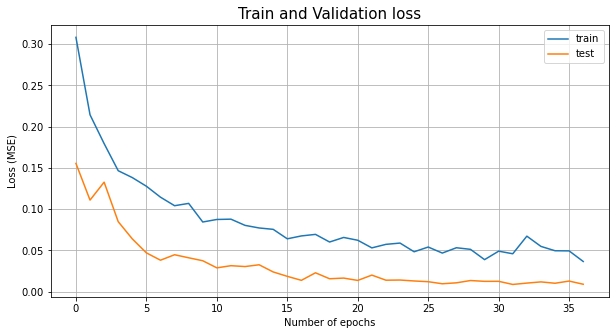

In [15]:
''' plotting results '''
mp.plot(history)

In [16]:
''' test loss '''
mp.losses(model, y_test, X_test)

(0.8982000020734043, 7.623317373384493)

In [17]:
''' train loss '''
mp.losses(model, y_train, X_train)

(0.8699307573636957, 7.10982058599533)

## 1072

In [18]:
mp = MakePrediction(1072) # Enter node Id here
history, X_train, X_test, y_train, y_test, model = mp.training_and_testing()

Epoch 1/50
86/86 [==============================] - 3s 11ms/step - loss: 0.0955 - val_loss: 0.0505
Epoch 2/50
86/86 [==============================] - 1s 7ms/step - loss: 0.0592 - val_loss: 0.0314
Epoch 3/50
86/86 [==============================] - 1s 8ms/step - loss: 0.0514 - val_loss: 0.0348
Epoch 4/50
86/86 [==============================] - 1s 7ms/step - loss: 0.0390 - val_loss: 0.0106
Epoch 5/50
86/86 [==============================] - 1s 7ms/step - loss: 0.0330 - val_loss: 0.0064
Epoch 6/50
86/86 [==============================] - 1s 7ms/step - loss: 0.0276 - val_loss: 0.0044
Epoch 7/50
86/86 [==============================] - 1s 7ms/step - loss: 0.0238 - val_loss: 0.0034
Epoch 8/50
86/86 [==============================] - 1s 7ms/step - loss: 0.0188 - val_loss: 0.0027
Epoch 9/50
86/86 [==============================] - 1s 8ms/step - loss: 0.0178 - val_loss: 0.0019
Epoch 10/50
86/86 [==============================] - 1s 7ms/step - loss: 0.0178 - val_loss: 0.0034
Epoch 11/50
86/86 

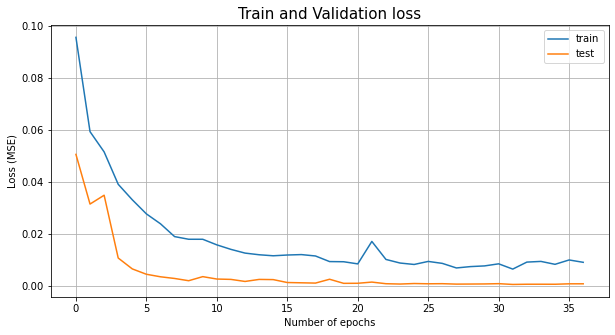

In [19]:
''' plotting results '''
mp.plot(history)

In [20]:
''' test loss '''
mp.losses(model, y_test, X_test)

(0.06844373181960778, 2.1251707528286015)

In [21]:
''' train loss '''
mp.losses(model, y_train, X_train)

(0.1497161431872988, 2.303772630958197)

## All Nodes

In [22]:
nodes = df_in.node_id.unique().tolist()
d = {
    'node': [], 'train_mse': [], 'test_mse': [], 'train_mae': [], 'test_mae': [], 'diff_mse': [], 'diff_mae': [] , 'epochs': []
    }

In [23]:
for n in nodes:
    print("In node: {}".format(n))
    mp = MakePrediction(n)
    history, X_train, X_test, y_train, y_test, model = mp.training_and_testing()
    
    try:
        train_mse, train_mae = mp.losses(model, y_train, X_train)
        test_mse, test_mae = mp.losses(model, y_test, X_test)
    except:
        continue
    
    d['epochs'].append(len(history.history['val_loss']))
    d['node'].append(n)
    d['train_mse'].append(train_mse)
    d['test_mse'].append(test_mse)
    d['train_mae'].append(train_mae)
    d['test_mae'].append(test_mae)
    
    diff_mse = train_mse - test_mse
    d['diff_mse'].append(diff_mse)
    
    diff_mae = train_mae - test_mae
    d['diff_mae'].append(diff_mae)

    print("*" * 125)
    print()

In node: 312
Epoch 1/50
115/115 [==============================] - 3s 10ms/step - loss: 0.0668 - val_loss: 0.0390
Epoch 2/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0421 - val_loss: 0.0266
Epoch 3/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0351 - val_loss: 0.0300
Epoch 4/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0350 - val_loss: 0.0242
Epoch 5/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0337 - val_loss: 0.0229
Epoch 6/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0341 - val_loss: 0.0250
Epoch 7/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0340 - val_loss: 0.0205
Epoch 8/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0317 - val_loss: 0.0200
Epoch 9/50
115/115 [==============================] - 1s 8ms/step - loss: 0.0292 - val_loss: 0.0137
Epoch 10/50
115/115 [==============================] - 1s 8ms/step - loss: 0.0272 - va

373/373 [==============================] - 3s 7ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 6/50
373/373 [==============================] - 3s 7ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 7/50
373/373 [==============================] - 3s 7ms/step - loss: 0.0069 - val_loss: 0.0112
Epoch 8/50
373/373 [==============================] - 3s 7ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 9/50
373/373 [==============================] - 3s 7ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 10/50
373/373 [==============================] - 3s 7ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 11/50
373/373 [==============================] - 3s 7ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 00011: early stopping
*****************************************************************************************************************************

In node: 849
Epoch 1/50
401/401 [==============================] - 4s 8ms/step - loss: 0.0156 - val_loss: 0.0112
Epoch 2/50
401/401 [=====================

Epoch 7/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 8/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0101 - val_loss: 0.0094
Epoch 9/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 10/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 11/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 12/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 13/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 14/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 15/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 16/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0095 - val_loss: 

974/974 [==============================] - 8s 8ms/step - loss: 0.0145 - val_loss: 1.4005e-06
Epoch 5/50
974/974 [==============================] - 8s 9ms/step - loss: 0.0145 - val_loss: 1.4005e-06
Epoch 6/50
974/974 [==============================] - 8s 9ms/step - loss: 0.0145 - val_loss: 1.4005e-06
Epoch 00006: early stopping
*****************************************************************************************************************************

In node: 944
Epoch 1/50
1002/1002 [==============================] - 10s 9ms/step - loss: 0.0141 - val_loss: 1.3918e-06
Epoch 2/50
1002/1002 [==============================] - 8s 8ms/step - loss: 0.0141 - val_loss: 1.3918e-06
Epoch 3/50
1002/1002 [==============================] - 7s 7ms/step - loss: 0.0141 - val_loss: 1.3918e-06
Epoch 4/50
1002/1002 [==============================] - 8s 8ms/step - loss: 0.0141 - val_loss: 1.3918e-06
Epoch 5/50
1002/1002 [==============================] - 8s 8ms/step - loss: 0.0141 - val_loss: 1.3918e-06


1546/1546 [==============================] - 12s 8ms/step - loss: 0.0114 - val_loss: 0.0088
Epoch 00006: early stopping
*****************************************************************************************************************************

In node: 1043
Epoch 1/50
1575/1575 [==============================] - 14s 8ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 2/50
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 3/50
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 4/50
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 5/50
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 6/50
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 00006: early stopping
*********************************************************************************************

Epoch 1/50
1861/1861 [==============================] - 19s 9ms/step - loss: 0.0162 - val_loss: 0.0147
Epoch 2/50
1861/1861 [==============================] - 14s 8ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 3/50
1861/1861 [==============================] - 14s 8ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 4/50
1861/1861 [==============================] - 14s 8ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 5/50
1861/1861 [==============================] - 14s 8ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 6/50
1861/1861 [==============================] - 14s 8ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 00006: early stopping
*****************************************************************************************************************************

In node: 1072
Epoch 1/50
1890/1890 [==============================] - 16s 8ms/step - loss: 0.0159 - val_loss: 0.0145
Epoch 2/50
1890/1890 [==============================] - 14s 8ms/step - loss: 0.0159 - val_loss: 0.0145
Epoch 3

In [24]:
result = pd.DataFrame(d)
result.head()

,node,train_mse,test_mse,train_mae,test_mae,diff_mse,diff_mae,epochs
0,312,0.823641,0.786319,6.679236,6.871276,0.037322,-0.192040,16
1,826,1.314080,1.226510,11.020925,10.850484,0.087571,0.170441,25
2,827,0.485562,0.514316,5.401429,5.576318,-0.028754,-0.174889,11
3,832,0.235484,0.129155,2.415296,2.207971,0.106329,0.207325,13
4,833,0.836012,0.747892,8.056125,7.761414,0.088119,0.294711,11


In [25]:
# saving result in csv file

result.to_csv('rnn_results.csv')

In [26]:
#done